# Apache Spark

## План лекции
* Вспоминаем прошлые
* Говорим о Спарке
* Пробуем Спарк в действии

## Вспоминаем прошлые лекции

### Как устроен Hadoop
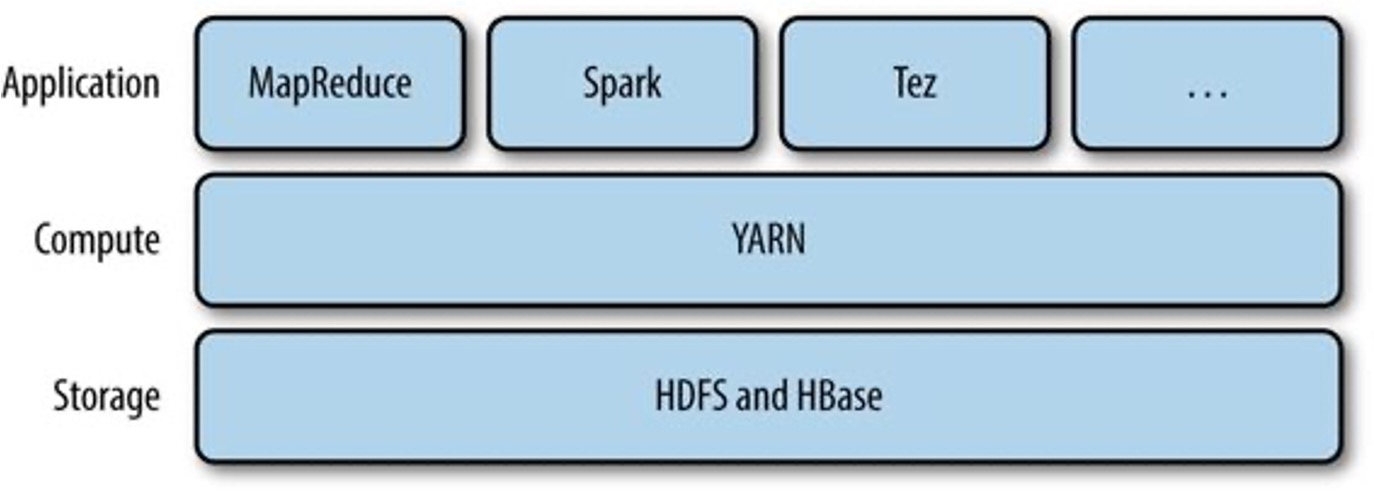

### Что такое Hive
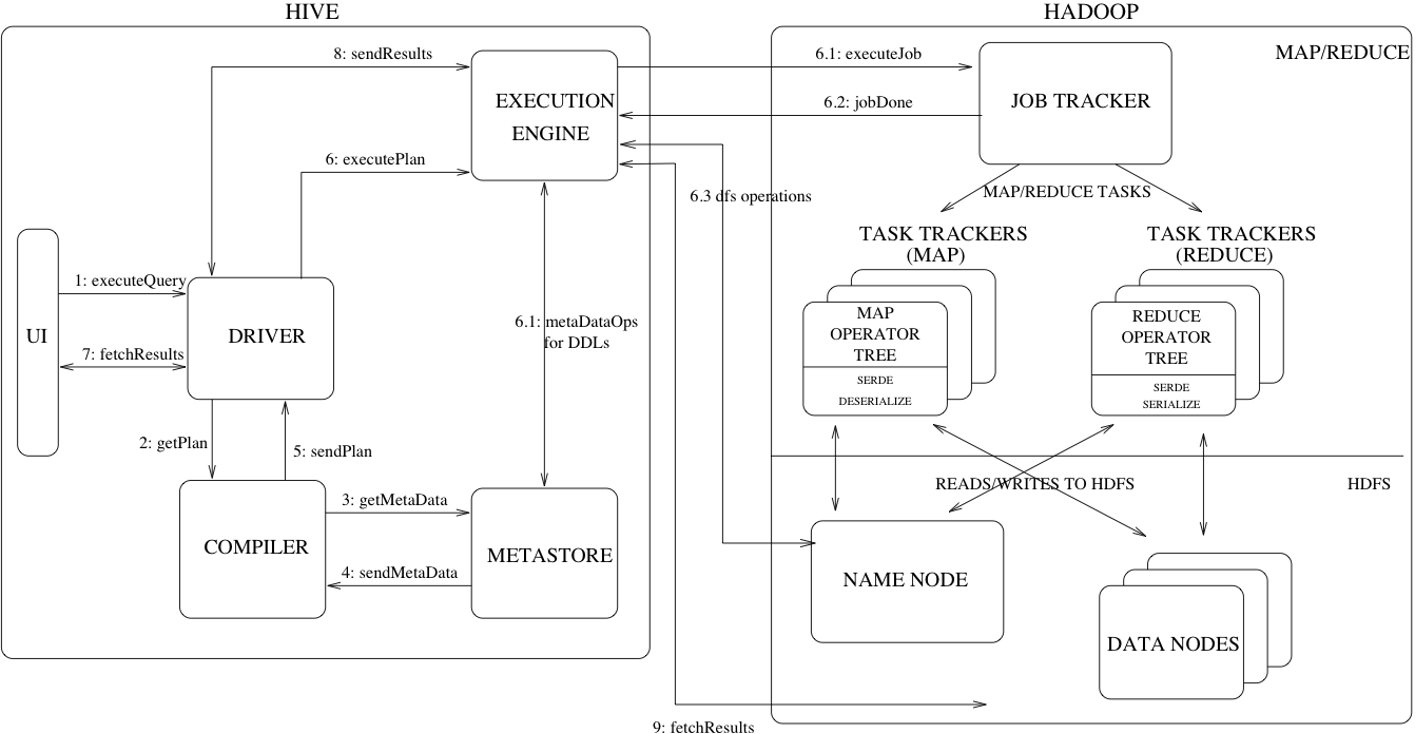

### HiveQL
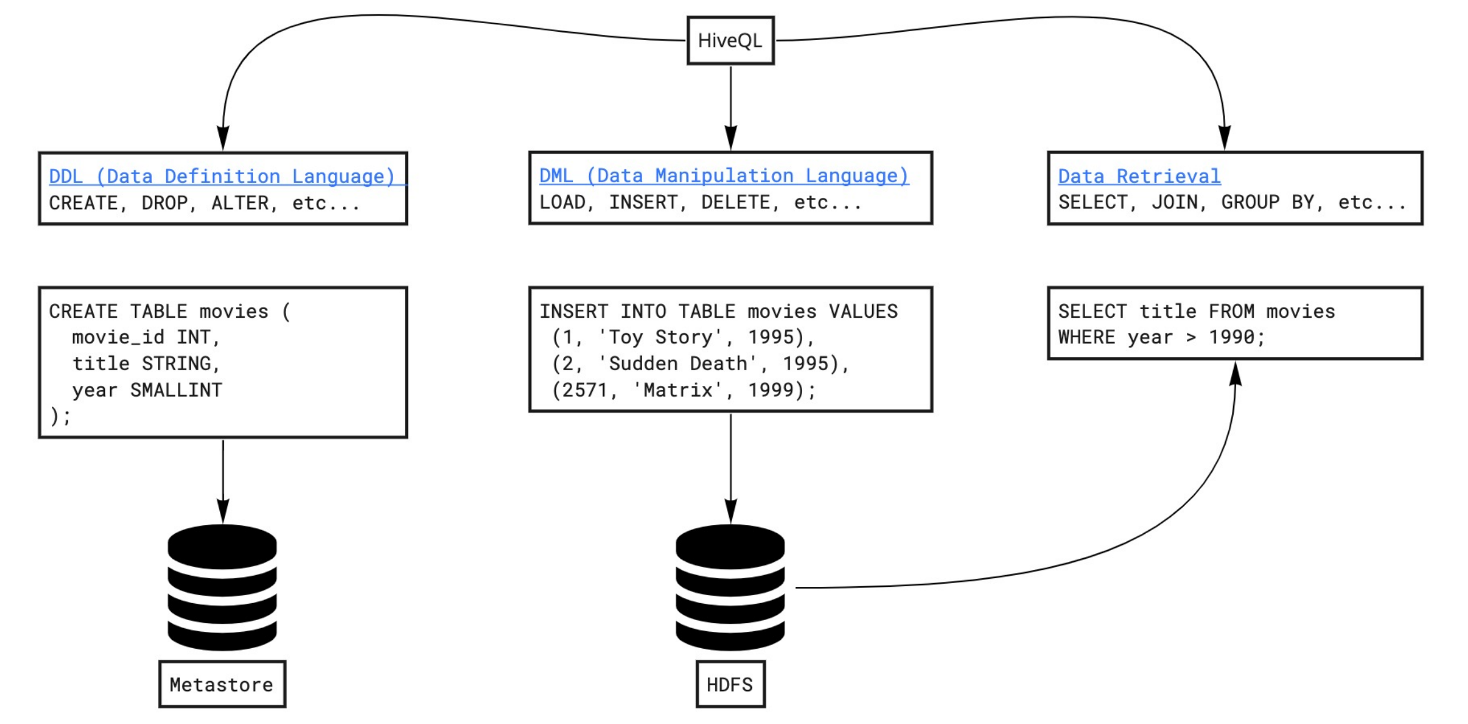

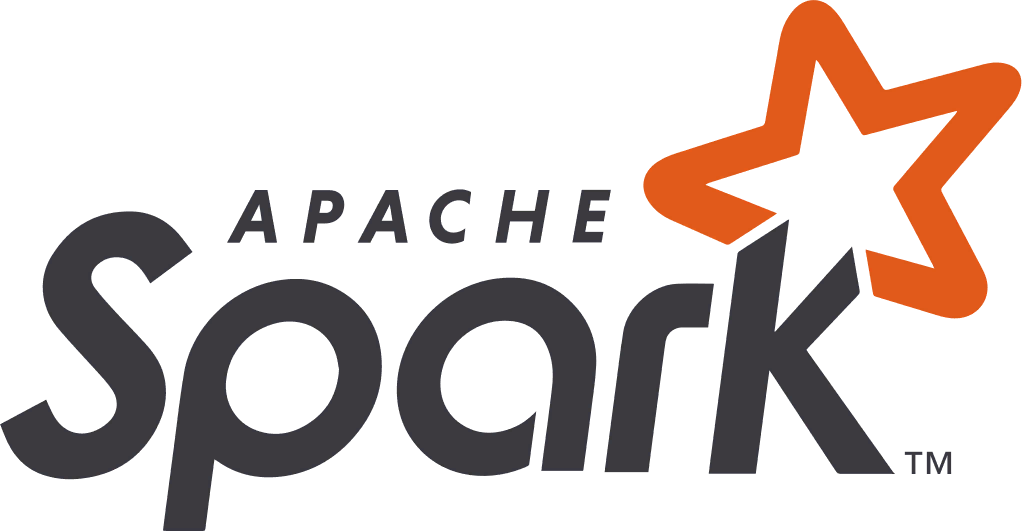

## Начнем с основ

### Подготовка к запуску

In [1]:
import os
import sys

SPARK_HOME = "/usr/lib/spark3"
PYSPARK_PYTHON = "/opt/conda/envs/dsenv/bin/python"
os.environ["PYSPARK_PYTHON"]= PYSPARK_PYTHON
os.environ["PYSPARK_DRIVER_PYTHON"]= PYSPARK_PYTHON
os.environ["SPARK_HOME"] = SPARK_HOME

PYSPARK_HOME = os.path.join(SPARK_HOME, "python/lib")
sys.path.insert(0, os.path.join(PYSPARK_HOME, "py4j-0.10.9.5-src.zip"))
sys.path.insert(0, os.path.join(PYSPARK_HOME, "pyspark.zip"))

### Архитектура
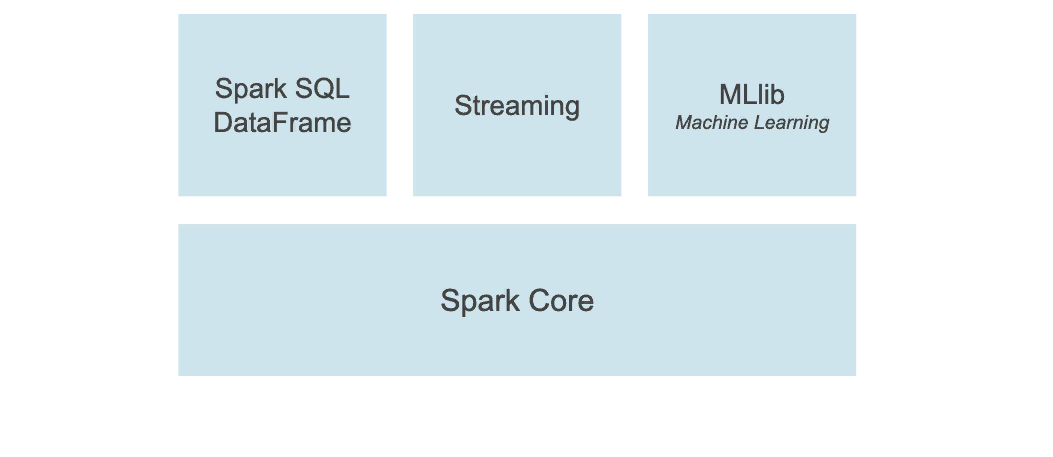

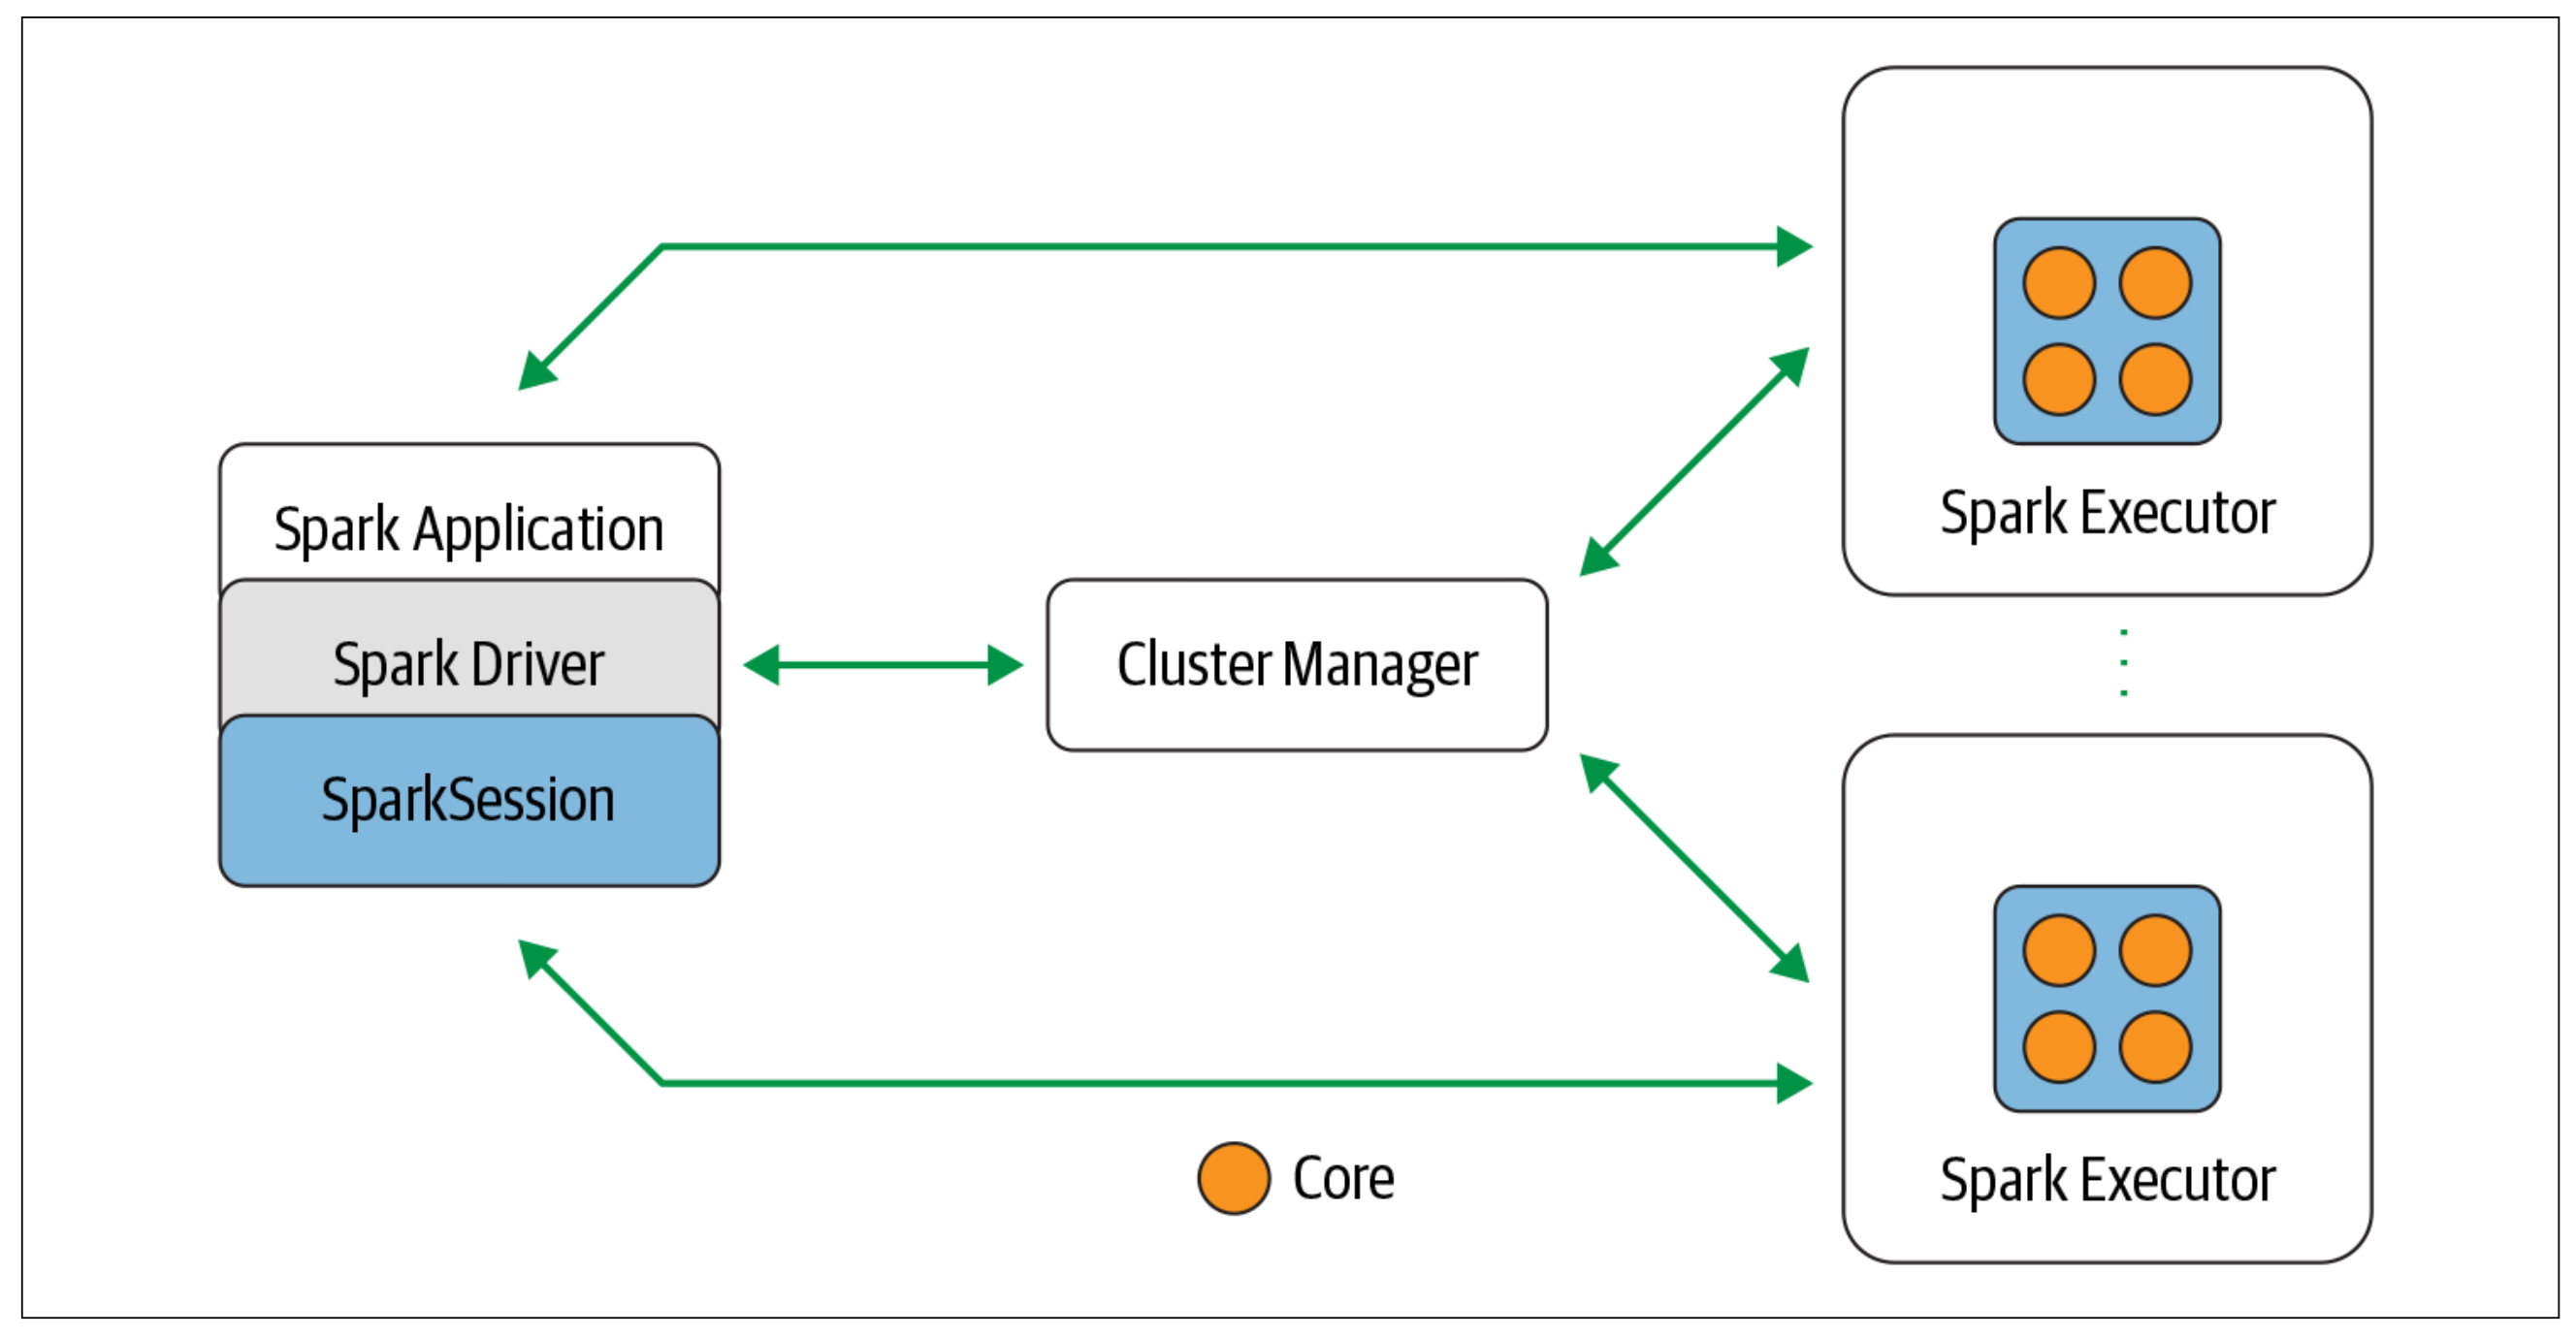

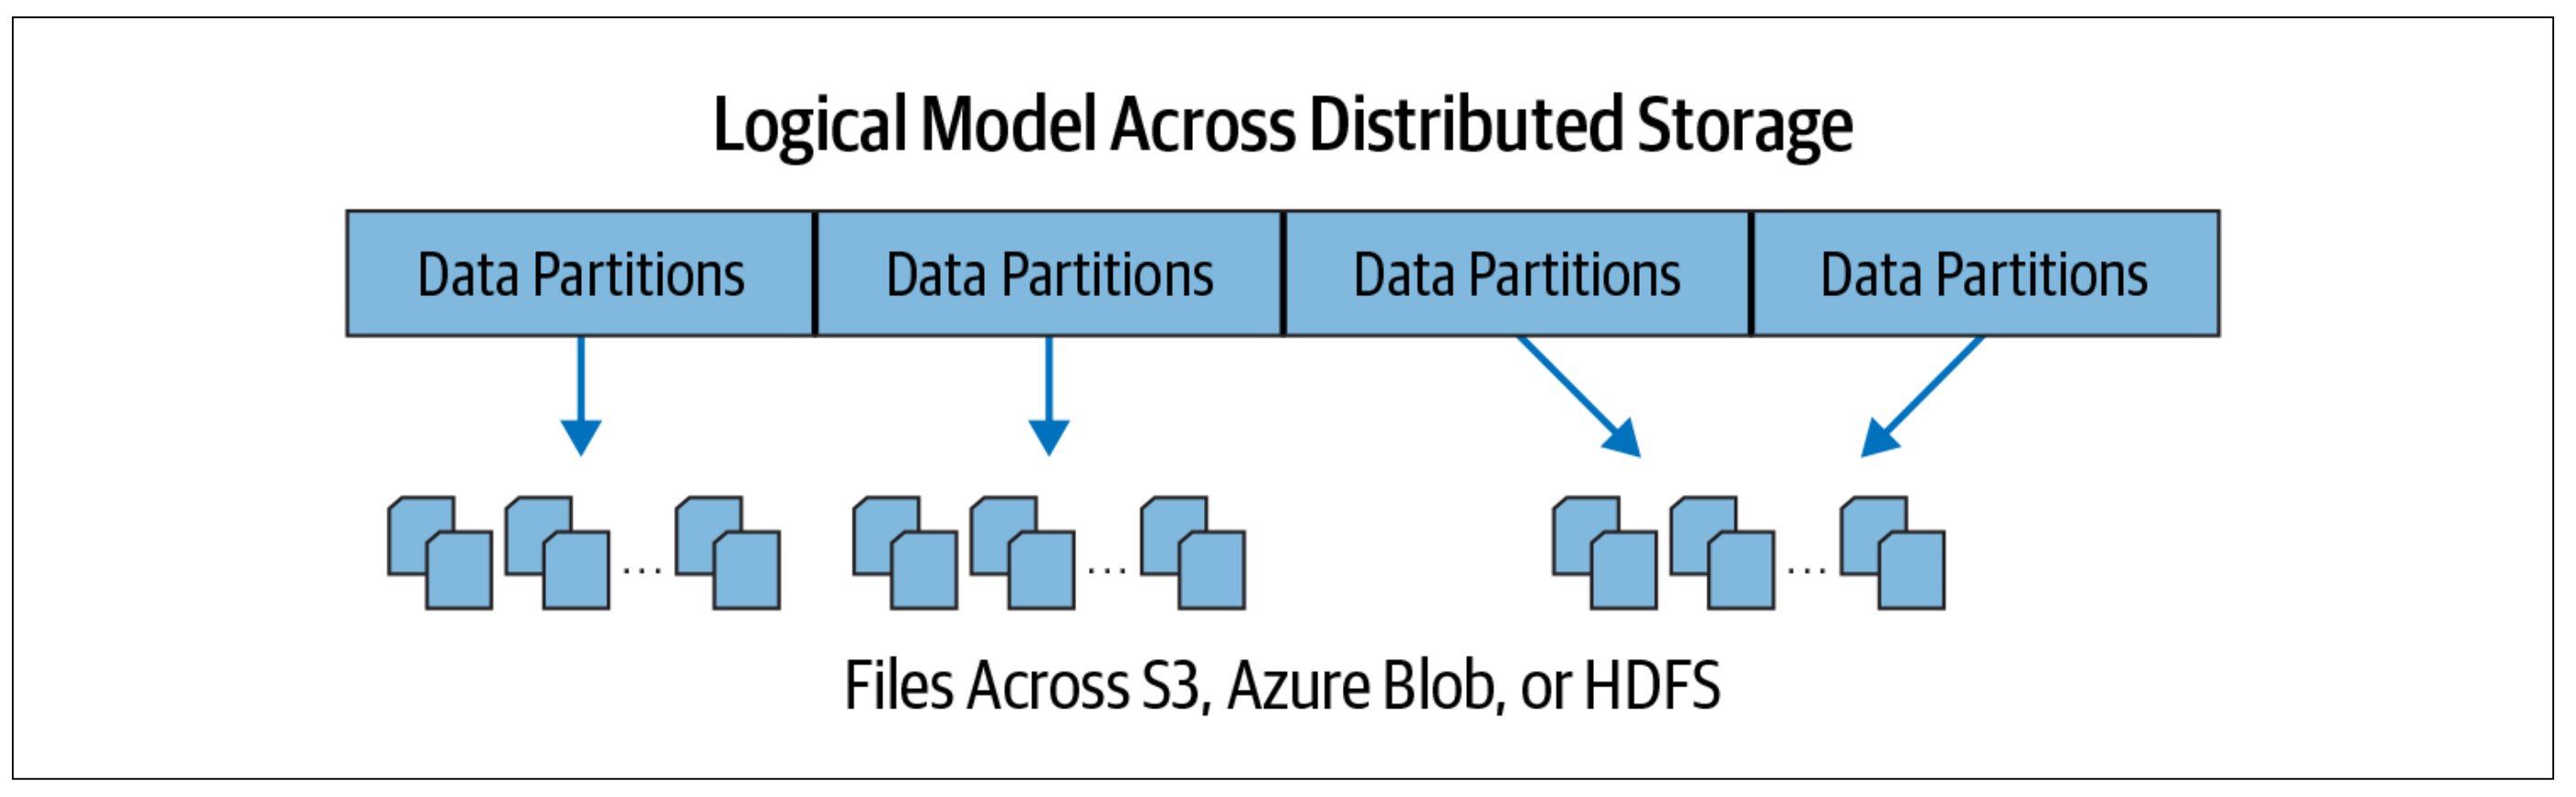

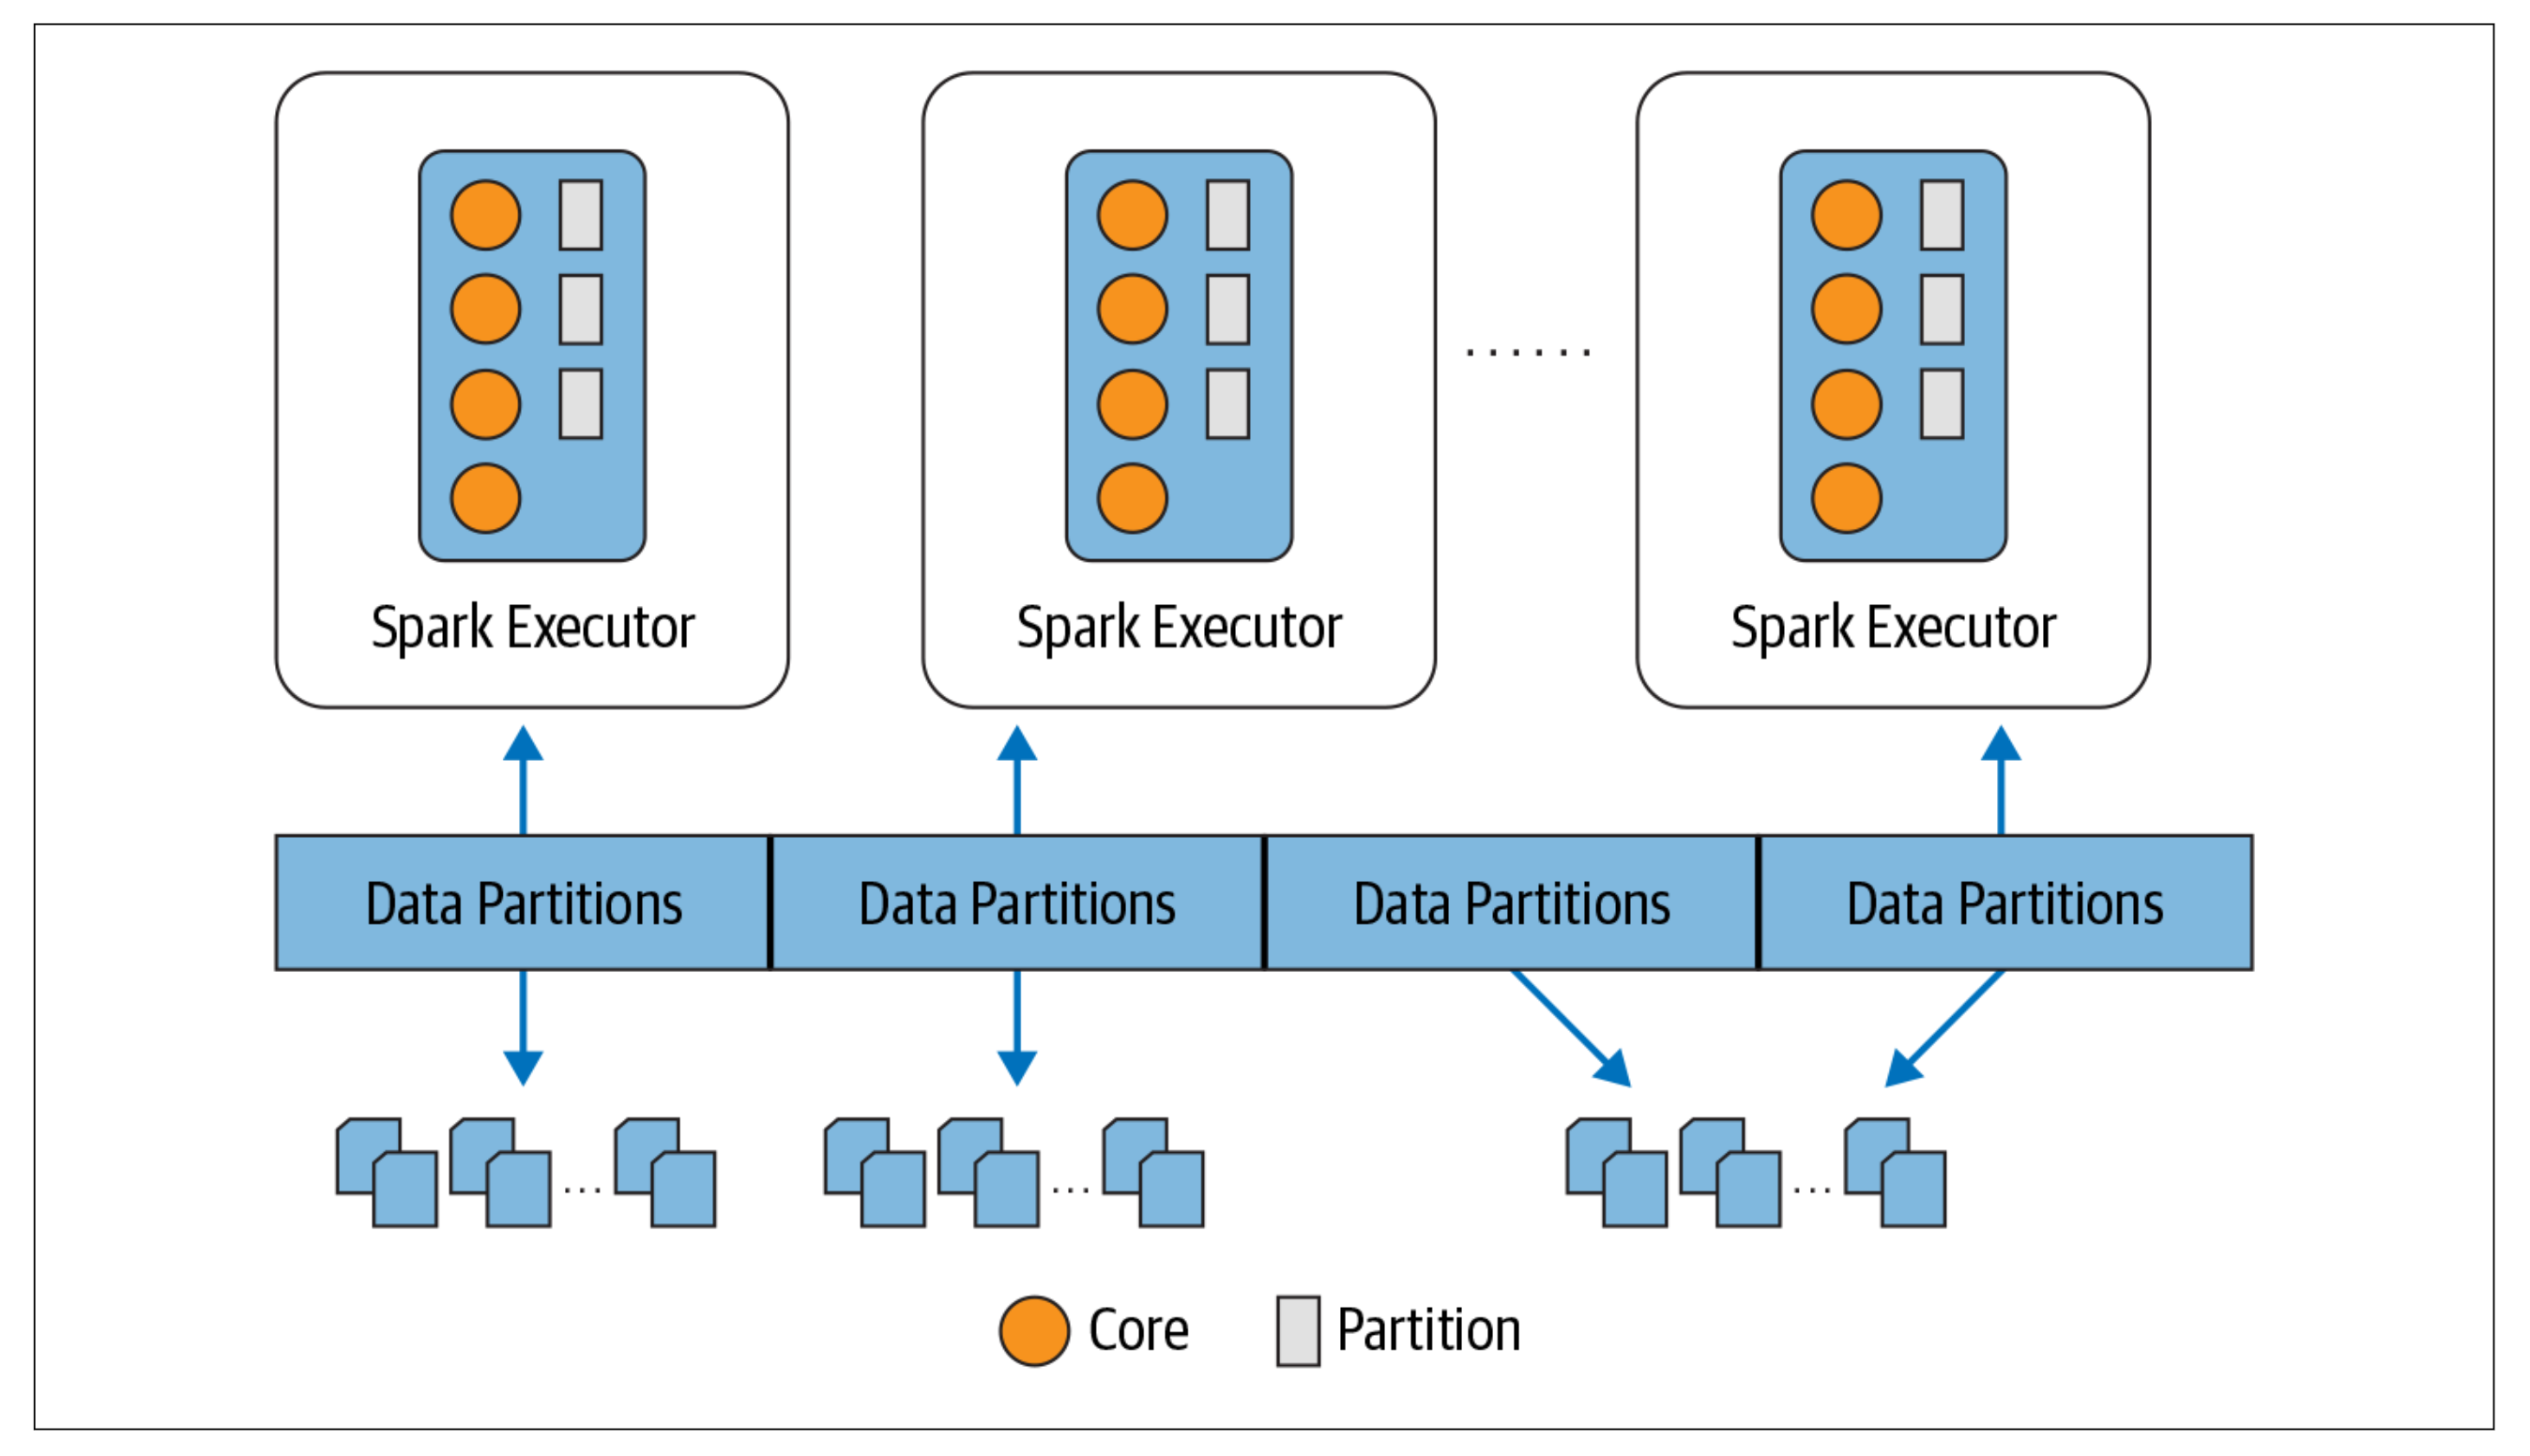

### Работа по этапам
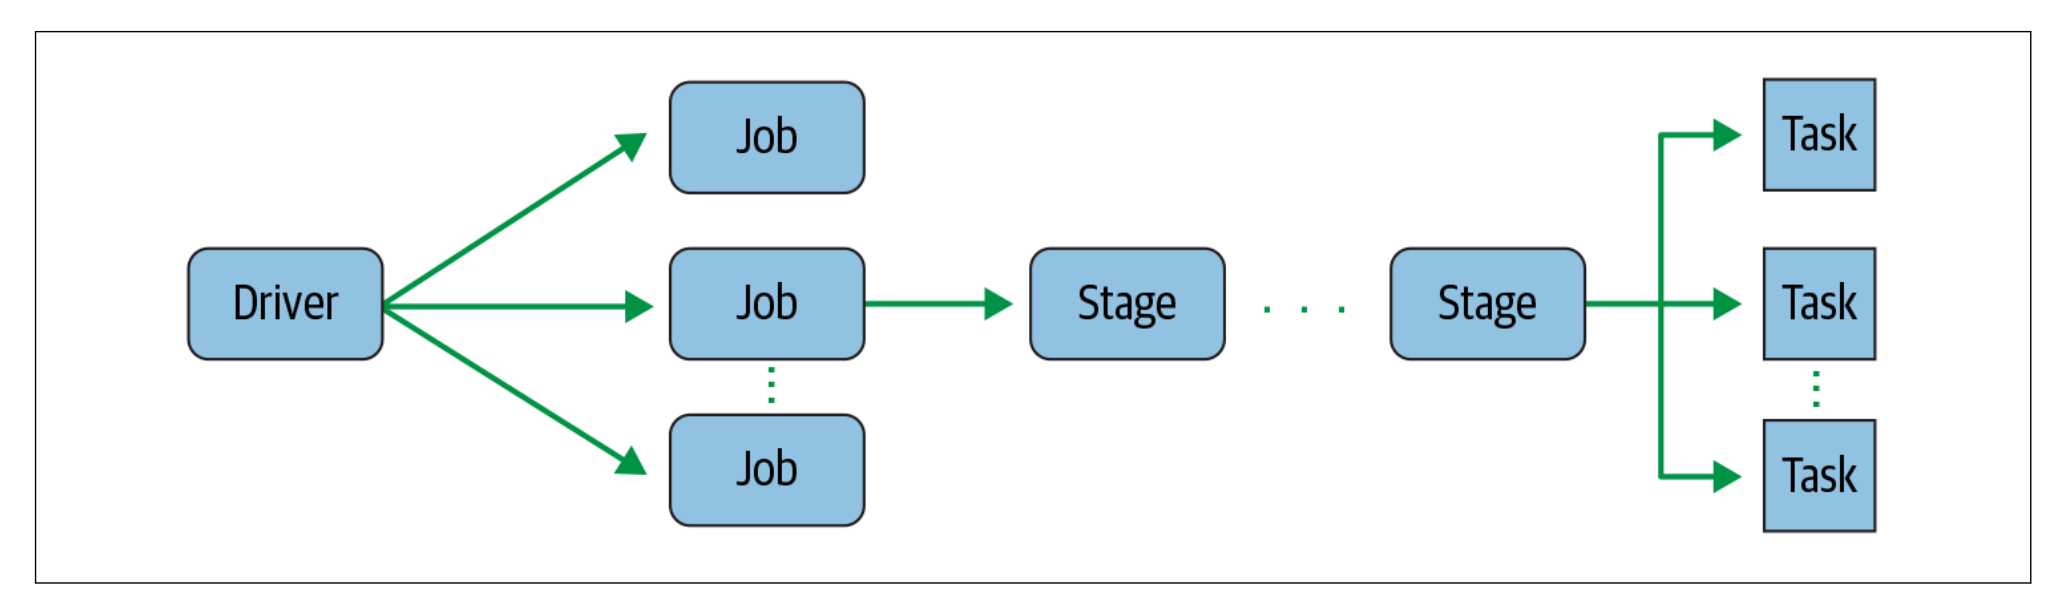

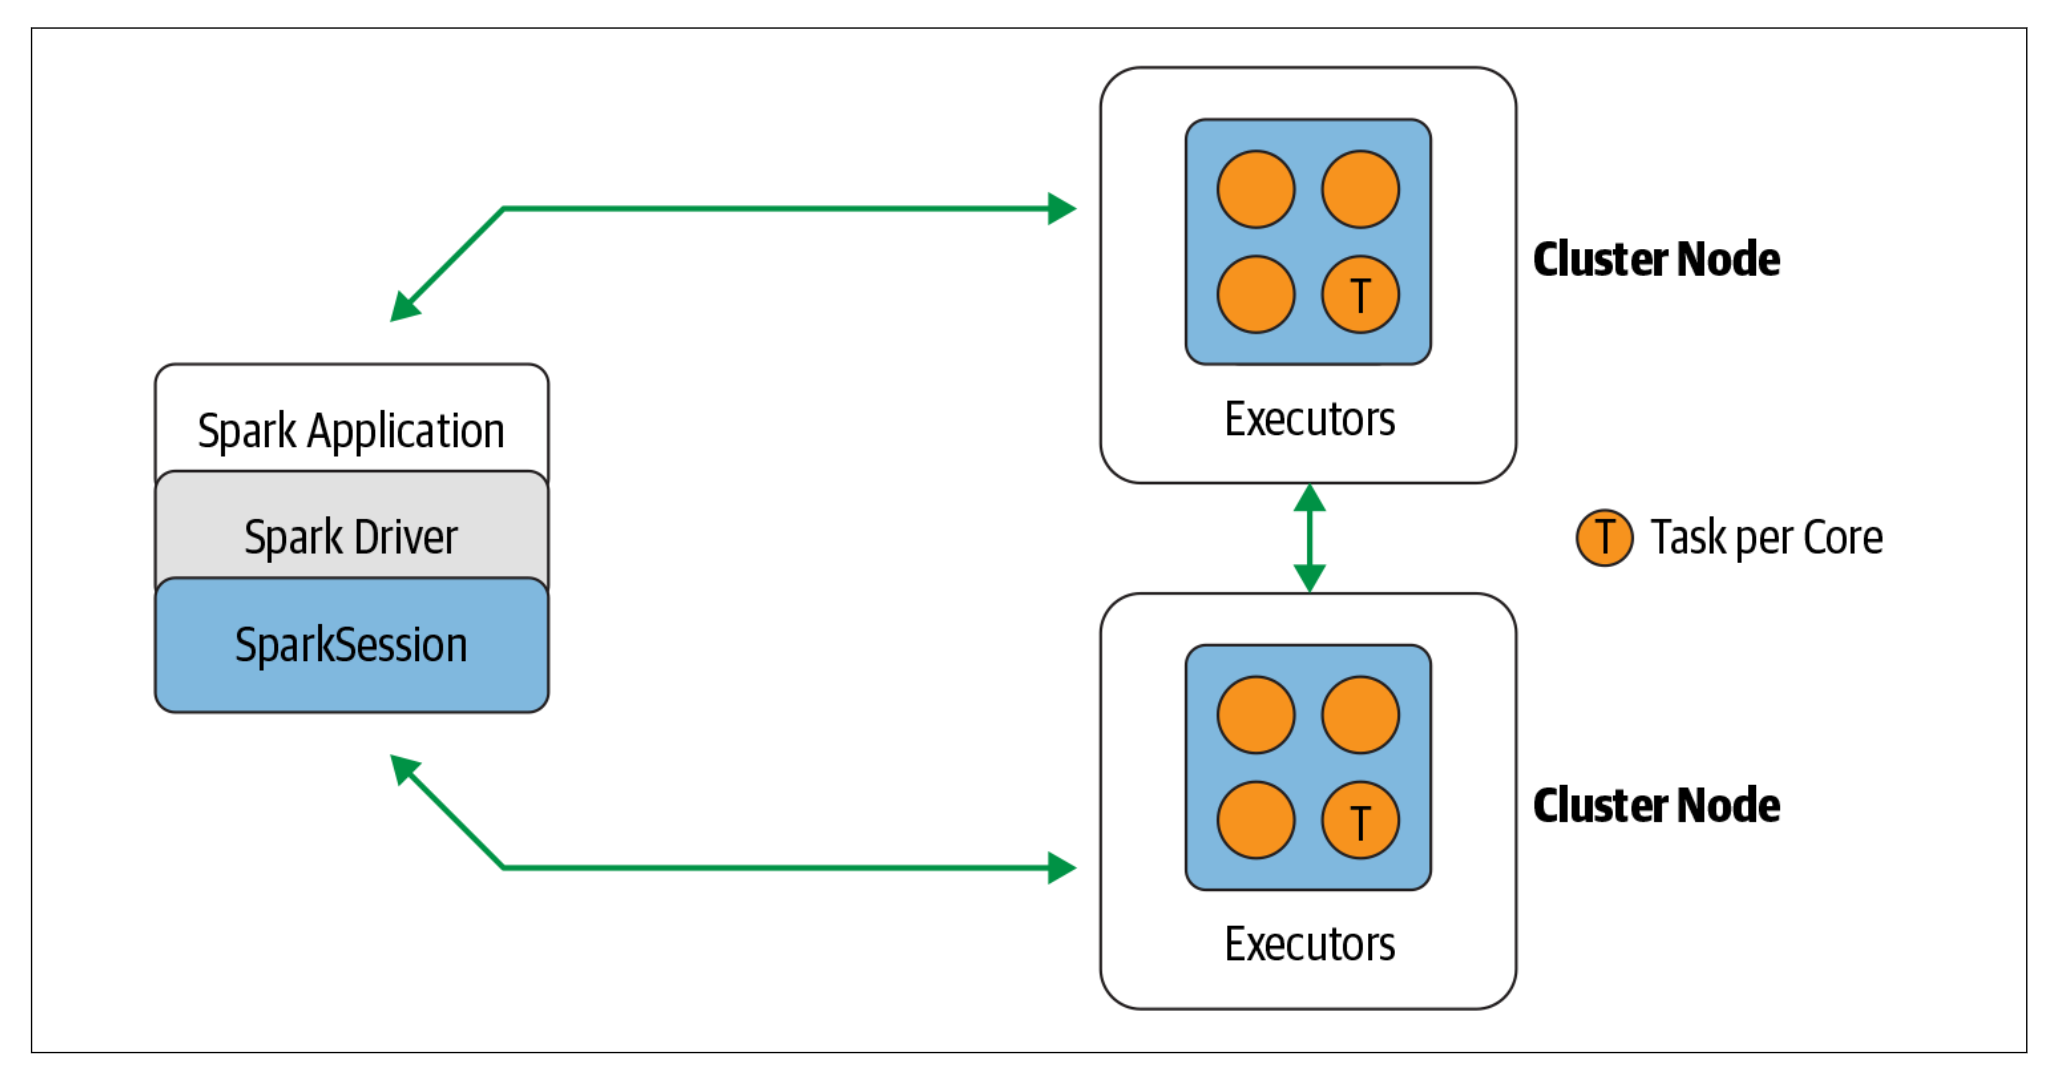

### Ленивый спарк
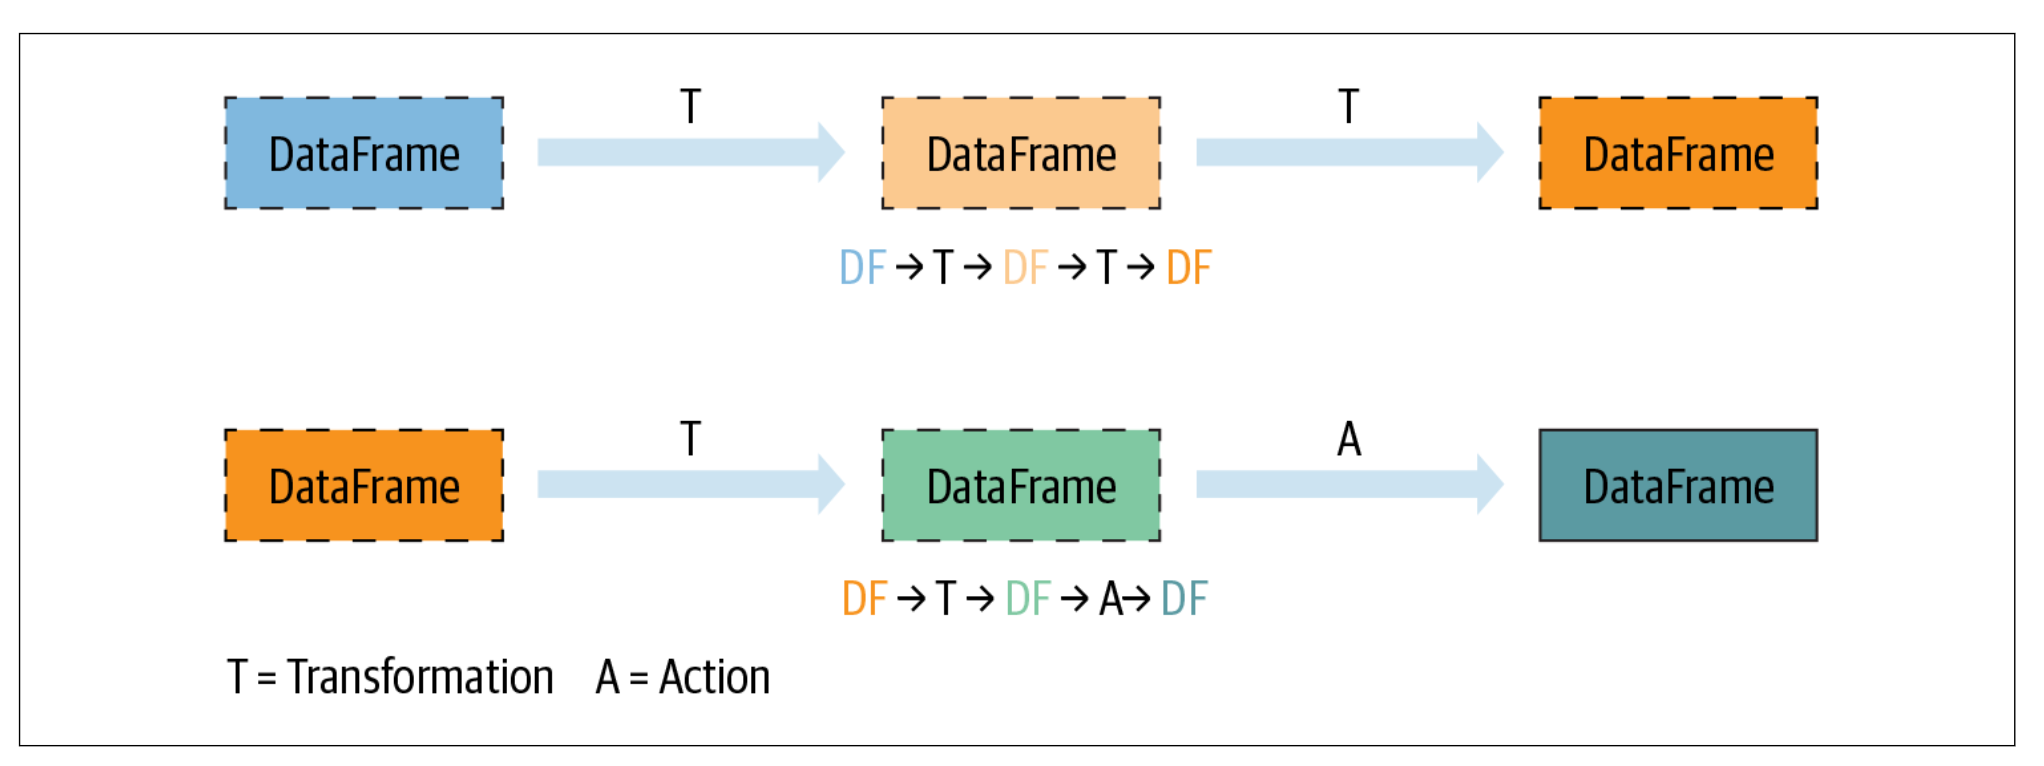


## Spark RDD

### Зачем использовать RDD?
* Нужен функционал, которого не оказалось в датафреймах, а 
* У вас есть старая кодовая база с RDD
* Вам нужен контроль за данными и за распределенными переменными

### Что такое RDD?
Resilient Distributed Dataset, основа основ Apache Spark, низкоуровненая базовая абстракция, в которую превратится ваш код на DataFrame API

Из чего состоит RDD
* Dependencies
* Partitions (with some locality information)
* Compute function: Partition => Iterator[T]

### Проблемы
* Ориентирован на JVM
* Испольщование Python ведет к просадке производительности
* Требует прописывать большую часть логики

## Dependencies

Очень важная часть жизни спарководов, она же **transformations**
* **Narrow** - завимость от одного узла выполнения, прямолинейная трансформация, возможна без Shuffle
* **Wide** - завимость от нескольких узлов выполнения, сложная трансформация, невозможна без Shuffle

## Dataframe API

### Dataframe:
+ структурированная колоночная структура данных
+ может быть создана на основе:
  - локальной коллекции
  - файла (файлов)
  - базы данных
+ в Python работает значительно быстрее, чем RDD
+ под капотом использует RDD
+ позволяет выполнять произвольные SQL операции с данными
+ аналогично RDD являются ленивыми и неизменяеыми

### Из чего состоит Dataframe?
+ схема [pyspsark.sql.StructType](https://spark.apache.org/docs/3.3.0/api/python/reference/pyspark.sql/api/pyspark.sql.types.StructType.html)
+ колонки [pyspark.sql.Column](https://spark.apache.org/docs/3.3.0/api/python/reference/pyspark.sql/column.html)
+ данные [pyspark.sql.Row](https://spark.apache.org/docs/3.3.0/api/python/reference/pyspark.sql/row.html)

## Основной управляющий объект в Spark - [SparkSession](https://spark.apache.org/docs/3.3.0/api/python/reference/pyspark.sql/spark_session.html)

## /opt/shared - Ноутбук тут

In [3]:
from pyspark import SparkConf
from pyspark.sql import SparkSession

conf = SparkConf()
conf.set("spark.ui.port", "12949")

spark = SparkSession.builder.config(conf=conf).appName("Spark SQL").getOrCreate()

24/04/14 13:27:41 WARN SparkContext: Another SparkContext is being constructed (or threw an exception in its constructor). This may indicate an error, since only one SparkContext should be running in this JVM (see SPARK-2243). The other SparkContext was created at:
org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.lang.reflect.Constructor.newInstance(Constructor.java:423)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServ

Py4JJavaError: An error occurred while calling None.org.apache.spark.api.java.JavaSparkContext.
: org.apache.hadoop.security.AccessControlException: Permission denied: user=kravchenko01, access=WRITE, inode="/user":hdfs:hadoop:drwxr-xr-x
	at org.apache.hadoop.hdfs.server.namenode.FSPermissionChecker.check(FSPermissionChecker.java:399)
	at org.apache.hadoop.hdfs.server.namenode.FSPermissionChecker.checkPermission(FSPermissionChecker.java:255)
	at org.apache.hadoop.hdfs.server.namenode.FSPermissionChecker.checkPermission(FSPermissionChecker.java:193)
	at org.apache.hadoop.hdfs.server.namenode.FSDirectory.checkPermission(FSDirectory.java:1852)
	at org.apache.hadoop.hdfs.server.namenode.FSDirectory.checkPermission(FSDirectory.java:1836)
	at org.apache.hadoop.hdfs.server.namenode.FSDirectory.checkAncestorAccess(FSDirectory.java:1795)
	at org.apache.hadoop.hdfs.server.namenode.FSDirMkdirOp.mkdirs(FSDirMkdirOp.java:59)
	at org.apache.hadoop.hdfs.server.namenode.FSNamesystem.mkdirs(FSNamesystem.java:3146)
	at org.apache.hadoop.hdfs.server.namenode.NameNodeRpcServer.mkdirs(NameNodeRpcServer.java:1126)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolServerSideTranslatorPB.mkdirs(ClientNamenodeProtocolServerSideTranslatorPB.java:707)
	at org.apache.hadoop.hdfs.protocol.proto.ClientNamenodeProtocolProtos$ClientNamenodeProtocol$2.callBlockingMethod(ClientNamenodeProtocolProtos.java)
	at org.apache.hadoop.ipc.ProtobufRpcEngine$Server$ProtoBufRpcInvoker.call(ProtobufRpcEngine.java:523)
	at org.apache.hadoop.ipc.RPC$Server.call(RPC.java:991)
	at org.apache.hadoop.ipc.Server$RpcCall.run(Server.java:872)
	at org.apache.hadoop.ipc.Server$RpcCall.run(Server.java:818)
	at java.security.AccessController.doPrivileged(Native Method)
	at javax.security.auth.Subject.doAs(Subject.java:422)
	at org.apache.hadoop.security.UserGroupInformation.doAs(UserGroupInformation.java:1729)
	at org.apache.hadoop.ipc.Server$Handler.run(Server.java:2678)

	at sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
	at sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
	at java.lang.reflect.Constructor.newInstance(Constructor.java:423)
	at org.apache.hadoop.ipc.RemoteException.instantiateException(RemoteException.java:121)
	at org.apache.hadoop.ipc.RemoteException.unwrapRemoteException(RemoteException.java:88)
	at org.apache.hadoop.hdfs.DFSClient.primitiveMkdir(DFSClient.java:2421)
	at org.apache.hadoop.hdfs.DFSClient.mkdirs(DFSClient.java:2395)
	at org.apache.hadoop.hdfs.DistributedFileSystem$27.doCall(DistributedFileSystem.java:1325)
	at org.apache.hadoop.hdfs.DistributedFileSystem$27.doCall(DistributedFileSystem.java:1322)
	at org.apache.hadoop.fs.FileSystemLinkResolver.resolve(FileSystemLinkResolver.java:81)
	at org.apache.hadoop.hdfs.DistributedFileSystem.mkdirsInternal(DistributedFileSystem.java:1339)
	at org.apache.hadoop.hdfs.DistributedFileSystem.mkdirs(DistributedFileSystem.java:1314)
	at org.apache.hadoop.fs.FileSystem.mkdirs(FileSystem.java:2275)
	at org.apache.hadoop.fs.FileSystem.mkdirs(FileSystem.java:674)
	at org.apache.spark.deploy.yarn.Client.prepareLocalResources(Client.scala:507)
	at org.apache.spark.deploy.yarn.Client.createContainerLaunchContext(Client.scala:982)
	at org.apache.spark.deploy.yarn.Client.submitApplication(Client.scala:220)
	at org.apache.spark.scheduler.cluster.YarnClientSchedulerBackend.start(YarnClientSchedulerBackend.scala:62)
	at org.apache.spark.scheduler.TaskSchedulerImpl.start(TaskSchedulerImpl.scala:222)
	at org.apache.spark.SparkContext.<init>(SparkContext.scala:585)
	at org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
	at sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
	at sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
	at java.lang.reflect.Constructor.newInstance(Constructor.java:423)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:238)
	at py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
	at py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.hadoop.ipc.RemoteException(org.apache.hadoop.security.AccessControlException): Permission denied: user=kravchenko01, access=WRITE, inode="/user":hdfs:hadoop:drwxr-xr-x
	at org.apache.hadoop.hdfs.server.namenode.FSPermissionChecker.check(FSPermissionChecker.java:399)
	at org.apache.hadoop.hdfs.server.namenode.FSPermissionChecker.checkPermission(FSPermissionChecker.java:255)
	at org.apache.hadoop.hdfs.server.namenode.FSPermissionChecker.checkPermission(FSPermissionChecker.java:193)
	at org.apache.hadoop.hdfs.server.namenode.FSDirectory.checkPermission(FSDirectory.java:1852)
	at org.apache.hadoop.hdfs.server.namenode.FSDirectory.checkPermission(FSDirectory.java:1836)
	at org.apache.hadoop.hdfs.server.namenode.FSDirectory.checkAncestorAccess(FSDirectory.java:1795)
	at org.apache.hadoop.hdfs.server.namenode.FSDirMkdirOp.mkdirs(FSDirMkdirOp.java:59)
	at org.apache.hadoop.hdfs.server.namenode.FSNamesystem.mkdirs(FSNamesystem.java:3146)
	at org.apache.hadoop.hdfs.server.namenode.NameNodeRpcServer.mkdirs(NameNodeRpcServer.java:1126)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolServerSideTranslatorPB.mkdirs(ClientNamenodeProtocolServerSideTranslatorPB.java:707)
	at org.apache.hadoop.hdfs.protocol.proto.ClientNamenodeProtocolProtos$ClientNamenodeProtocol$2.callBlockingMethod(ClientNamenodeProtocolProtos.java)
	at org.apache.hadoop.ipc.ProtobufRpcEngine$Server$ProtoBufRpcInvoker.call(ProtobufRpcEngine.java:523)
	at org.apache.hadoop.ipc.RPC$Server.call(RPC.java:991)
	at org.apache.hadoop.ipc.Server$RpcCall.run(Server.java:872)
	at org.apache.hadoop.ipc.Server$RpcCall.run(Server.java:818)
	at java.security.AccessController.doPrivileged(Native Method)
	at javax.security.auth.Subject.doAs(Subject.java:422)
	at org.apache.hadoop.security.UserGroupInformation.doAs(UserGroupInformation.java:1729)
	at org.apache.hadoop.ipc.Server$Handler.run(Server.java:2678)

	at org.apache.hadoop.ipc.Client.getRpcResponse(Client.java:1511)
	at org.apache.hadoop.ipc.Client.call(Client.java:1457)
	at org.apache.hadoop.ipc.Client.call(Client.java:1367)
	at org.apache.hadoop.ipc.ProtobufRpcEngine$Invoker.invoke(ProtobufRpcEngine.java:228)
	at org.apache.hadoop.ipc.ProtobufRpcEngine$Invoker.invoke(ProtobufRpcEngine.java:116)
	at com.sun.proxy.$Proxy34.mkdirs(Unknown Source)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolTranslatorPB.mkdirs(ClientNamenodeProtocolTranslatorPB.java:653)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at org.apache.hadoop.io.retry.RetryInvocationHandler.invokeMethod(RetryInvocationHandler.java:422)
	at org.apache.hadoop.io.retry.RetryInvocationHandler$Call.invokeMethod(RetryInvocationHandler.java:165)
	at org.apache.hadoop.io.retry.RetryInvocationHandler$Call.invoke(RetryInvocationHandler.java:157)
	at org.apache.hadoop.io.retry.RetryInvocationHandler$Call.invokeOnce(RetryInvocationHandler.java:95)
	at org.apache.hadoop.io.retry.RetryInvocationHandler.invoke(RetryInvocationHandler.java:359)
	at com.sun.proxy.$Proxy35.mkdirs(Unknown Source)
	at org.apache.hadoop.hdfs.DFSClient.primitiveMkdir(DFSClient.java:2419)
	... 27 more


In [4]:
SparkConf?

In [6]:
spark.stop()

NameError: name 'spark' is not defined

In [5]:
spark.sparkContext

NameError: name 'spark' is not defined

## Как создать DataFrame?

### Прочитать данные из файла

In [ ]:
help(spark.read)

### Конвейер чтения данных
```python
spark.read\
     .format(...)\
     .option(key, value)\
     .option(key, value)\
     .load(path)
```

In [ ]:
%%time
df = spark.read\
          .format("csv")\
          .option("sep", ",")\
          .load("/datasets/movielens/ratings.csv")

### Что получаем?

In [ ]:
df

In [ ]:
df.show(1)

In [ ]:
df.printSchema()

In [ ]:
df.take(5)

### Схема!

#### Давайте прочитаем схему из данных!

In [ ]:
df = spark.read\
          .format("csv")\
          .option("sep", ",")\
          .option("header","true")\
          .load("/datasets/movielens/ratings.csv")

In [ ]:
df.printSchema()

#### А если с типами?

In [ ]:
from pyspark.sql.types import *

In [ ]:
schema = StructType(fields=[
    StructField("userId", IntegerType()),
    StructField("movieId", IntegerType()),
    StructField("rating", FloatType()),
    StructField("timestamp", IntegerType())
])

In [ ]:
%%time
df = spark.read\
          .schema(schema)\
          .format("csv")\
          .option("header","true")\
          .load("/datasets/movielens/ratings.csv")

In [ ]:
df

In [ ]:
df.printSchema()

In [ ]:
df.show(5)

### Схему также можно задавать в виде SQL DDL

In [ ]:
ddl_schema = """
    userId INT,
    movieId INT,
    rating FLOAT,
    timestamp INT
"""

In [ ]:
%%time
df = spark.read\
          .schema(schema)\
          .format("csv")\
          .option("header","true")\
          .load("/datasets/movielens/ratings.csv")

In [ ]:
df.printSchema()

### Наличие схемы оборачивается еще одним приятным бонусом - правильно работает описательная статистика.

In [ ]:
df.summary().show()

#### Попробуем добавить немного магии и фильтров

In [ ]:
import pyspark.sql.functions as f

In [ ]:
df = df.withColumn("timestamp", f.col("timestamp").astype(TimestampType()))

In [ ]:
df.show(5)

In [ ]:
df.filter(df.rating > 4.0).filter(f.year(df.timestamp) == "2004").select("userId", "movieId", "rating").take(10)

#### А как распределяются данные?

In [ ]:
small_df = df.filter(df.rating > 4.0)\
             .filter(df.userId == 3)\
             .filter(f.year(df.timestamp) == "2018")\
             .select("movieId", "rating")

In [ ]:
small_df.cache()

In [ ]:
small_df.count()

#### Сколько партиций у данных?

In [ ]:
small_df.rdd.getNumPartitions()

#### А как отфильтрованные данные по ним распределены?

In [ ]:
small_df.rdd.glom().collect()

#### Как исправить?

In [ ]:
small_df.repartition(5).rdd.glom().collect()

#### А что случится, если не вызывать шафл?

In [ ]:
small_df.coalesce(3).rdd.glom().collect()

### Что значит `nullable`?

In [ ]:
tiny_schema = StructType(fields=[
    StructField("id", IntegerType()),
    StructField("value", StringType(), nullable=False)
])

In [ ]:
df = spark.createDataFrame([[1, None], [3, "Hello"]], schema=tiny_schema)

In [ ]:
tiny_schema = StructType(fields=[
    StructField("id", IntegerType()),
    StructField("value", StringType(), nullable=True)
])

In [ ]:
spark.createDataFrame?

In [ ]:
df = spark.createDataFrame([[1, None], [3, "Hello"]], schema=tiny_schema)

In [ ]:
df.printSchema()

### На самом деле конвейер чтения выглядит так
```python
spark.read\
     .schema(schema)\
     .format(...)\
     .option(key, value)\
     .option(key, value)\
     .load(path)
```

### Для популярных источников есть удобные обертки

In [ ]:
spark.read.csv?

In [ ]:
df = spark.read.csv("/datasets/movielens/ratings.csv", schema=schema, header=True)

In [ ]:
df.show(5)

### А самое классное, что через один API можно работать с множеством источников!
+ CSV
+ JSON
+ Hive
+ HBase
+ Cassandra
+ MySQL
+ PostgreSQL
+ Parquet
+ ORC
+ Kafka
+ ElasticSearch
+ Amazon S3
+ ...and more through custom connectors

### DataFrame можно создавать из RDD, pandas.DataFrame или вообще массива

In [ ]:
rdd = spark.sparkContext.textFile("/datasets/movielens/ratings.csv", ).map(lambda x: x.split(","))

In [ ]:
rdd.take(5)

In [ ]:
df = spark.createDataFrame(rdd)

### RDD нетипизирован и никакой схемы не имеет

In [ ]:
df.show(5)

In [ ]:
df = spark.createDataFrame(rdd, schema=schema)

In [ ]:
df.show(5)

### Может быть, если мы это проигнорируем, оно само уйдет?

In [ ]:
df = spark.createDataFrame(rdd, schema=schema, verifySchema=False)

In [ ]:
df.show(5)

### %(

In [ ]:
from itertools import islice

rdd = rdd.mapPartitionsWithIndex(
    lambda idx, it: islice(it, 1, None) if idx == 0 else it 
)

In [ ]:
rdd.take(5)

In [ ]:
rdd = rdd.map(lambda x: (int(x[0]), int(x[1]), float(x[2]), int(x[3])))

In [ ]:
rdd.take(5)

In [ ]:
df = spark.createDataFrame(rdd, schema=schema)

In [ ]:
df.show(5)

## Работать будем со сгенерированным логом доступа

In [ ]:
!hdfs dfs -tail /datasets/logs/logsM.txt

In [ ]:
# схема?

In [ ]:
# чтение?

In [ ]:
log

In [ ]:
log.show(5)

#### Как-то неудобно. А можно что-то сделать?

## Проекции и фильтры
**Проекция** возвращает подмножество столбцов

**Фильтр** возвращает подмножество строк

In [ ]:
log.select(["ip", "timestamp", "url"])

In [ ]:
log.select("ip", "code").show(5)

In [ ]:
log.select(log.ip, log.code).show(5)

In [ ]:
log.ip

## Зачем нужны столбцы-объекты? Потому что у них есть методы!

In [ ]:
log.select(log.ip,
           log.code.alias("response")).show(5)

#### А еще можно сразу обозначить, что мы хотим работать с объектом колонки
ранее мы уже вполняли:

import pyspark.sql.functions as f

In [ ]:
log.select("ip", 
           f.col("code").alias("response")).show(5)

## Pandas-like

In [ ]:
log[["ip", "code"]].show(5)

In [ ]:
log[[log.ip, log.code.alias("response")]].show(5)

# Блеск и нищета Apache Spark - синтаксический сахар на все случаи жизни

## Фильтрация

In [ ]:
log.where("code = 200").show(5)

In [ ]:
log.filter(log.code == 200).show(5, truncate=False)

In [ ]:
log.filter("code == 200 AND url LIKE '%yandex%'").show(5, truncate=False, vertical=True)

In [ ]:
log.filter((log.code.isin([200, 404])) & (log.url.like("%yandex%"))).show(5)

In [ ]:
log.code?

## Pandas-like

In [ ]:
log[(log.code == 200) & (log.url.like("%yandex%"))].show(5)

## И все вместе

In [ ]:
log[(log.code == 200) & (log.url.like("%yandex%"))][["ip", "code"]].show(5)

## А SQL-то можно писать?

In [ ]:
query = """
SELECT ip, code FROM log_table 
WHERE code == 200 AND url LIKE '%yandex%'
"""

In [ ]:
spark.sql(query).show(5)

### При запуске на YARN `SparkSession` автоматически запускается с поддержкой HIVE. Поэтому надо зарегистрировать `DataFrame` как таблицу во внутреннем каталоге Spark SQL

In [ ]:
log.createOrReplaceTempView("log_table")

In [ ]:
spark.catalog.listTables()

In [ ]:
spark.sql(query).show(5)

## Функции
Не все вычисления можно реализовать стандартным SQL. Здесь на помощь приходят функции (встроенные или пользовательские). Встроенные функции находятся в модуле [`pyspark.sql.functions`](https://spark.apache.org/docs/2.4.7/api/python/pyspark.sql.html#module-pyspark.sql.functions) 

In [ ]:
log.select("ua", f.length("ua")).show(5)

### Функции возвращают объект типа `Column`

In [ ]:
f.length("ua")

In [ ]:
log.select("ua", f.length("ua").alias("length")).show(5)

### Довольно часто возникает ошибка с неверными именами столбцов

In [ ]:
log.select(f.concat("url", "?utm_medium=email")).show(5)

### Нужно убедиться в правильности имени или типа

In [ ]:
log.select(f.concat("url", f.lit("?utm_medium=email")).alias("newurl")).show(5, False)

## Высекаем искру сами

Посчитаем word count
Для начала попробуем разбить слова в массив через split

In [ ]:
# А как это сделать?
# word_count_df = ...

### Прелесть ленивых вычислений и строгой типизации

In [ ]:
word_count_df.printSchema()

### К элементам сложных типов можно получить доступ

In [ ]:
word_count_df.select(f.col("word_list")[0].alias("first_word"), f.col("word_list")[1].alias("second_word"))\
   .show(5)

А теперь попробуем с помощью explode и count получить количество слов

In [ ]:
# А как?

### Самое время посмотреть в Spark UI!

## Joins

In [ ]:
!hdfs dfs -tail /datasets/logs/ipDataM.txt

In [ ]:
ip_schema = StructType(fields=[
    StructField("ip", StringType()),
    StructField("region", StringType())
])

### Давайте явно скажем спарку, что датасет мы хотим хранить в памяти

In [ ]:
ips = spark.read.csv("/datasets/logs/ipDataM.txt", schema=ip_schema, sep="\t").cache()

In [ ]:
ips.show(5)

In [ ]:
log.show(5)

### Трюк для отключения автоматической оптимизации
Датасет с регионами микроскопичейский в сравнении с логами
Что будет, если мы попробуем его хранить прямо воркерах?

In [ ]:
spark.sql("SET spark.sql.autoBroadcastJoinThreshold = 100500")

In [ ]:
log_with_regions = log.join(ips, on="ip", how="inner")

In [ ]:
log_with_regions

In [ ]:
log_with_regions.show(5)

In [ ]:
log.explain(extended=True)

In [ ]:
log_with_regions.explain(True)

### Можно делать не только equi-join, но и по произвольному выражению

In [ ]:
ips_with_ts = ips.withColumn("timestamp", f.lit(20220127041332).cast("bigint"))

In [ ]:
ips_with_ts.show(5)

In [ ]:
log.join(ips_with_ts, on=((log.ip == ips_with_ts.ip) & (log.timestamp > ips_with_ts.timestamp))).count()

In [ ]:
log_with_regions.count()

### А что там с партициями?

In [ ]:
(log.rdd.getNumPartitions(),
 ips.rdd.getNumPartitions(),
 log_with_regions.rdd.getNumPartitions())

In [ ]:
spark.conf.get("spark.sql.shuffle.partitions")

In [ ]:
log_with_regions = log_with_regions.repartition(4).cache()

### По умолчанию Spark SQL использует алгоритм SortMergeJoin
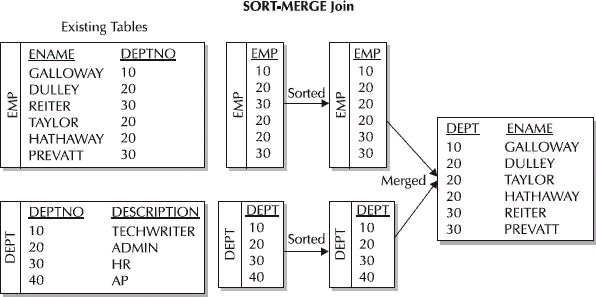

In [ ]:
log_with_regions.explain(extended=True)

### Если одна из таблиц мала, то можно реализовать map-side join явно через broadcast

In [ ]:
log_with_regions = log.join(f.broadcast(ips), on="ip", how="inner")

In [ ]:
log_with_regions.explain(extended=True)

А давайте посчитаем распределение? И отсортируем по убыванию

In [ ]:
# А как?

### Аггрегация внутри группировки
```python
df.groupBy(*cols)\
  .agg(*expressions)
```

In [ ]:
# А как переписать?

А давайте попробуем посчитать статистику по длине слов. Найдите функцию для подсчета длины, сгруппируйте по ней, пропишите аггрегацию по количеству строк, отсортируйте по убыванию количества

In [ ]:
# Код сюда
# length_stat = ...

In [ ]:
length_stat.toPandas()

## UDF (User Defined Functions)
The function type of the UDF can be one of the following:
+ **SCALAR**. A scalar UDF defines a transformation: One or more `pandas.Series` -> A `pandas.Series`. Scalar UDFs are used with `pyspark.sql.DataFrame.withColumn()` and `pyspark.sql.DataFrame.select()`
+ **GROUPED_MAP**. A grouped map UDF defines transformation: A `pandas.DataFrame` -> A `pandas.DataFrame`. Grouped map UDFs are used with `pyspark.sql.GroupedData.apply()`

In [ ]:
@f.pandas_udf(StringType())
def encode_http_status(codes):
    mapping = {
        1: "info",
        2: "success",
        3: "redirect",
        4: "client error",
        5: "server error"
    }
    return (codes // 100).replace(mapping)

In [ ]:
log.withColumn("http_status", encode_http_status("code"))\
   .groupBy("http_status").count().show()

In [ ]:
log_filtered = log.filter("size > 1000").select("ip", "size", "code").cache()

In [ ]:
log_filtered.printSchema()

In [ ]:
log_filtered.show()

In [ ]:
log_filtered.count()

In [ ]:
log_filtered.rdd.getNumPartitions()

In [ ]:
spark.stop()

# Подсчет числа пользовательских сессий
Вам необходимо подсчитать число пользовательских сессий в разбивке по доменам на данных из лог-файла.

**Пользовательская сессия** - это пребывание пользователя на сайте такое, что между двумя последовательными кликами проходит не более 30 минут.
Лог-файл такой же, как и на лекции. Находится в HDFS по пути `/datasets/logs/logsM.txt`

## Задание №1
Создайте `DataFrame` из лог-файла. Схему можно скопировать из лекции.

In [ ]:
# Ваш код здесь

## Задание №2
Лог не содержит столбца с доменом. Конечно можно извлечь домен с помощью функции [regexp_extract](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.functions.regexp_extract), но мы так делать не будем. Напишите `pandas_udf`, которая будет извлекать домены из столбца `url`. Результаты применения функции поместите в столбец `domain`.

Для извлечения домена можно воспользоваться функцией [urlparse](https://docs.python.org/3/library/urllib.parse.html#urllib.parse.urlparse)

In [ ]:
# Ваш код здесь

## Задание №3
Для разминки давайте подсчитаем сколько дней прошло между первым и последним посещением пользователем нашего домена. Будем считать, что интересующий нас домен ` www.ozon.ru`. В качестве "уникального" идентификатора пользователя договоримся использовать ip-адрес. Использовать оконные функции в данном задании не надо!

### Задание №3.1
Для выполнения задания №3 понадобится делать операции с датами. Заметьте, что в столбце `timestamp` хранится не настоящий timestamp, а число с датой в формате "yyyyMMddHHmmss". Используя функции из `pyspark.sql.functions`, создайте новый столбец `timestamp`, содержащий в себе UNIX timestamp.

При возникновении ошибок, обратите внимание на типы данных. Возможно их нужно привести.

In [ ]:
log.show(10, False)

In [ ]:
# Ваш код здесь

### Задание №3.2
Приведя timestamp к правильному формату, решите исходную задачу. В результате должен получится `DataFrame` с двумя столбцами `ip` и `days`. Отсортируйте результат по столбцу `days` в порядке убывания и выведите первые 20 строк.

In [ ]:
# Ваш код здесь

## Задание №4
Подсчитайте число сессий, которое каждый пользователь (уникальный ip) сделал на домене `www.ozon.ru`. Для решения этой задачи потребуется использование оконных функций (что это такое чуть ниже). Для работы с окнами в Spark SQL используется метод [over()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.Column.over). Само окно определяется с помощью класса [Window](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.Window). Резудьтатом будет `DataFrame` со столбцами `ip` и `sessions`, отсортированный в порядке убывания числа сессий.

_Оконная функция_ выполняет вычисления для набора строк, некоторым образом связанных с текущей строкой. Можно сравнить её с агрегатной функцией, но, в отличие от обычной агрегатной функции, при использовании оконной функции несколько строк не группируются в одну, а продолжают существовать отдельно. Внутри же, оконная функция, как и агрегатная, может обращаться не только к текущей строке результата запроса.

![](https://www.sqlitetutorial.net/wp-content/uploads/2018/11/SQLite-window-function-vs-aggregate-function.png)

Вот пример, показывающий, как сравнить зарплату каждого сотрудника со средней зарплатой его отдела:

```sql
SELECT depname, empno, salary, avg(salary) OVER (PARTITION BY depname)
  FROM empsalary;
```

```
  depname  | empno | salary |          avg          
-----------+-------+--------+-----------------------
 develop   |    11 |   5200 | 5020.0000000000000000
 develop   |     7 |   4200 | 5020.0000000000000000
 develop   |     9 |   4500 | 5020.0000000000000000
 develop   |     8 |   6000 | 5020.0000000000000000
 develop   |    10 |   5200 | 5020.0000000000000000
 personnel |     5 |   3500 | 3700.0000000000000000
 personnel |     2 |   3900 | 3700.0000000000000000
 sales     |     3 |   4800 | 4866.6666666666666667
 sales     |     1 |   5000 | 4866.6666666666666667
 sales     |     4 |   4800 | 4866.6666666666666667
(10 rows)
```

[Документация PostgreSQL](https://postgrespro.ru/docs/postgrespro/12/tutorial-window)

In [ ]:
# Ваш код здесь

## Задание №5
Нарисуйте гистограмму распределения числа сессий

## Правила хорошего тона

In [ ]:
spark.stop()

# Dataframes, UI, Tuning

## Оптимизации Spark

### А какие у нас есть еще опции?
[Очень много](https://spark.apache.org/docs/latest/configuration.html)

In [ ]:
for p in sorted(conf.getAll(), key=lambda p: p[0]):
    print(p)

In [ ]:
for p in sorted(spark.sparkContext.getConf().getAll(), key=lambda p: p[0]):
    print(p)

In [ ]:
conf = SparkConf()
conf.set('spark.ui.port', '4099')
conf.set('spark.driver.memory', '2G')
conf.set('spark.executor.memory', '2G')

spark = SparkSession.builder.config(conf=conf).appName("spark_andrei").getOrCreate()

### Кривые данные

In [ ]:
data = """{"a": 1, "b":2, "c":3}|{"a": 1, "b":2, "c":3}|{"a": 1, "b, "c":10}""".split('|')

In [ ]:
data

In [ ]:
corruptDF = (spark.read
  .option("mode", "FAILFAST")
  .option("columnNameOfCorruptRecord", "_corrupt_record")
  .json(spark.sparkContext.parallelize(data))
)
corruptDF.show()

На клетке выше Спарк обработал испорченные данные и поместил их в специальную колонку, остальное успешно обработал.
Это поведение по умолчаниб, мы ничего не применяли опции `mode` и `columnNameOfCorruptRecord`.

Есть три варианта обработки испорченных записей через опцию [`ParseMode`](https://github.com/apache/spark/blob/master/sql/catalyst/src/main/scala/org/apache/spark/sql/catalyst/util/ParseMode.scala#L34):

| `ParseMode` | Поведение |
|-------------|----------|
| `PERMISSIVE` | Складывает все испорченные записии в специальную колонку "_corrupt_record" (по умолчанию) |
| `DROPMALFORMED` | Игнорирует все испорченные записи |
| `FAILFAST` | Выкидывает исключение на первой же неправильной записи |

Следующая клетка уже выкидывает испорченные данные:

In [ ]:
corruptDF = (spark.read
  .option("mode", "DROPMALFORMED")
  .json(spark.sparkContext.parallelize(data))
)
corruptDF.show()

### Кэширование
Какие вообще у нас опции?


* `DataFrame.persist(..)`

In [ ]:
help(pyspark.sql.DataFrame.persist)

In [ ]:
help(pyspark.storagelevel.StorageLevel)

In [ ]:
log.count()

In [ ]:
log.cache()

In [ ]:
%%time
log.count()

In [ ]:
log.unpersist()

In [ ]:
spark.catalog.clearCache()